In [68]:
!pip3 install networkx
#https://foss4g.tistory.com/1408
!pip3 install apyori


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum
from apyori import apriori

In [2]:
hanna=Hannanum()
df=pd.read_excel('/Users/halo8/Desktop/통합 문서1.xlsx')
data=list(df['text'])

In [5]:
dataset=[]
for d in data:
    dataset.append((hanna.nouns(re.sub('[^가-힣a-zA-Z\s]','',d))))

In [6]:
for dd in dataset:
    for r in ['리','나','수','창','를','기','세','급','되']:
        try:
            dd.remove(r)
        except:
            pass

In [18]:
result=(list(apriori(dataset,min_support=0.05)))

In [19]:
df2=pd.DataFrame(result)
df2['length']=df2['items'].apply(lambda x:len(x))
df2 = df2[(df2['length']==2)&(df2['support']>=0.01)].sort_values(by='support',ascending=False)
df2.head(10)

,items,support,ordered_statistics,length
49,"(기술, 미래)",0.37,"[((), (기술, 미래), 0.37, 1.0), ((기술), (미래), 0.552...",2
34,"(개발, 기술)",0.29,"[((), (개발, 기술), 0.29, 1.0), ((개발), (기술), 0.935...",2
56,"(기술, 세계)",0.23,"[((), (기술, 세계), 0.23, 1.0), ((기술), (세계), 0.343...",2
76,"(미래, 삼성)",0.21,"[((), (미래, 삼성), 0.21, 1.0), ((미래), (삼성), 0.428...",2
71,"(최고, 기술)",0.21,"[((), (최고, 기술), 0.21, 1.0), ((기술), (최고), 0.313...",2
88,"(최고, 미래)",0.20,"[((), (최고, 미래), 0.2, 1.0), ((미래), (최고), 0.4081...",2
105,"(최고, 세계)",0.19,"[((), (최고, 세계), 0.19, 1.0), ((세계), (최고), 0.655...",2
112,"(전문, 집단)",0.18,"[((), (전문, 집단), 0.18, 1.0), ((전문), (집단), 0.947...",2
113,"(최고, 전문)",0.17,"[((), (최고, 전문), 0.17, 1.0), ((전문), (최고), 0.894...",2
35,"(개발, 미래)",0.17,"[((), (개발, 미래), 0.17, 1.0), ((개발), (미래), 0.548...",2


In [20]:
G=nx.Graph()
ar=(df2['items']); G.add_edges_from(ar)

In [21]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

In [41]:
# 레이아웃
# pos=nx.planar_layout(G)
# pos=nx.frunchterman_reingold_layout(G)
# pos=nx.spectral_layout(G)
# pos=nx.random_layout(G)
# pos=nx.shell_layout(G)
# pos=nx.bipartite_layout(G)
# pos=nx.circular_layout(G)
pos=nx.spring_layout(G)
# pos=nx.kamada_kawai_layout(G)

<ipython-input-55-27e16a6567b8>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_incehs" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/halo8/Desktop/net.png',bbox_incehs='tight')


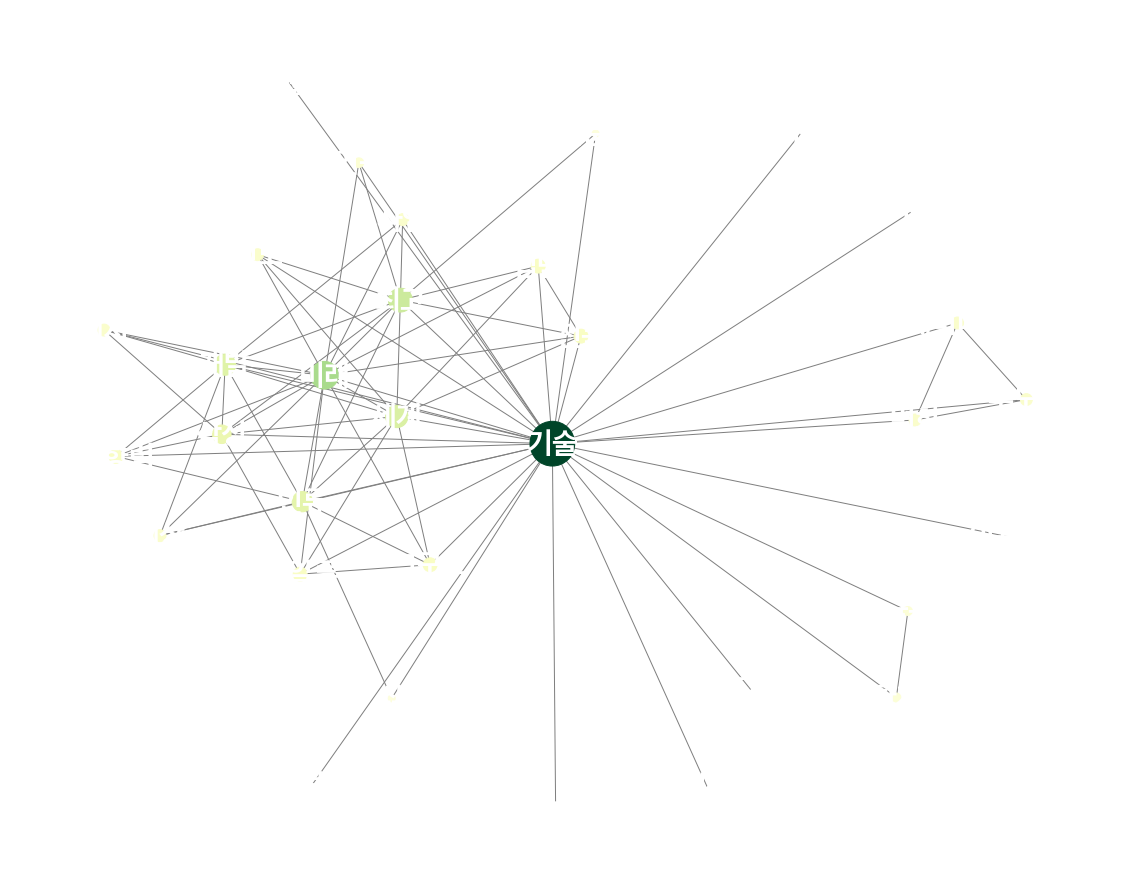

In [55]:
plt.figure(figsize=(20,16)); plt.axis('off')

nx.draw_networkx(G, font_size=30,font_family='AppleSDGothicNeoB00',font_color='w',
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                cmap=plt.cm.YlGn, alpha=1, edge_color='.5')
plt.savefig('/Users/halo8/Desktop/net.png',bbox_incehs='tight')